Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

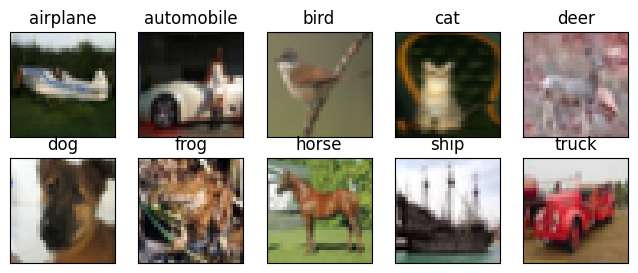

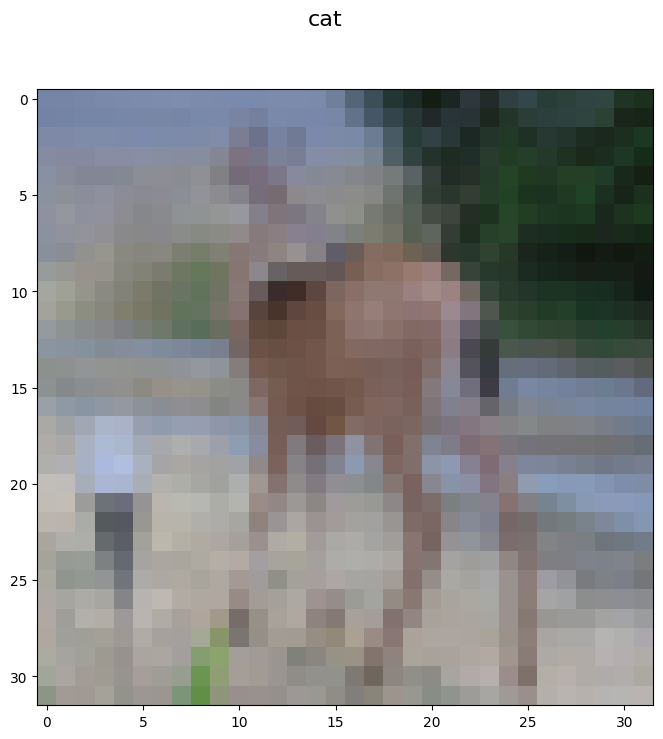

In [2]:
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import LearningRateScheduler, TensorBoard

def build_model():
    model = Sequential()
    model.add(Conv2D(6, (5, 5), padding='valid', activation = 'relu', kernel_initializer='he_normal', input_shape=(32,32,3)))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(16, (5, 5), padding='valid', activation = 'relu', kernel_initializer='he_normal'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(120, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dense(84, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))
    #sgd = optimizers.SGD(lr=.1, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def scheduler(epoch):
    if epoch < 100:
        return 0.01
    if epoch < 150:
        return 0.005
    return 0.001

if __name__ == '__main__':

    # load data
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    y_train_categorical = tf.keras.utils.to_categorical(y_train, 10)
    y_test_categorical = tf.keras.utils.to_categorical(y_test, 10)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255.0
    x_test /= 255.0

    class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
    
    fig = plt.figure(figsize=(8,3))

    num_classes = 10
    for i in range(num_classes):
        ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
        idx = np.where(y_train[:]==i)[0]
        features_idx = x_train[idx,::]
        img_num = np.random.randint(features_idx.shape[0])
        #im = np.transpose(features_idx[img_num,::], (1, 2, 0))
        im = features_idx[img_num,::]
        ax.set_title(class_names[i])
        plt.imshow(im)

    # build network
    model = build_model()
    print(model.summary())

    # set callback
    tb_cb = TensorBoard(log_dir='./LeNet_CIFAR10_graph', histogram_freq=0)
    change_lr = LearningRateScheduler(scheduler)
    cbks = [change_lr,tb_cb]

    # start training
    model.fit(x_train, y_train_categorical,
              batch_size=128,
              epochs=120,
              callbacks=cbks,
              validation_data=(x_test, y_test_categorical),
              shuffle=True)

    # save model
    model.save('LeNet_CIFAR10.h5')
    
    # Evaluation with one image prediction
    image_index = 100
    pred = model.predict(x_test[image_index,::].reshape(1, 32, 32, 3))
        
    #im = np.transpose(x_test[image_index,::], (1, 2, 0))
    im = x_test[image_index,::]
    
    fig1 = plt.figure(figsize=(16, 8))
    fig1.suptitle(class_names[np.argmax(pred)], fontsize=16)
    plt.imshow(im)